Face detection같이 빠르게 실행속도가 빨라야하는 상황에는 2-stage detector보다 1-stage detector를 더 활용한다.   
1-stage detector의 대표적인 모델인 YOLO,SSD,RetinaNet을 알아보자

## 1.YOLO

#### (1) YOLO v1

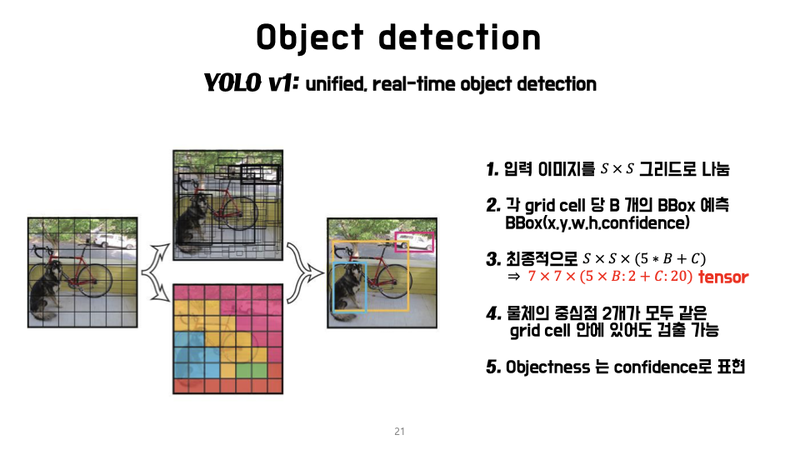

- YOLO는 이미지를 SxS grid로 나누고, 각 grid cell은 bounding box와 각 box의 confidence score를 예측한다.   
- 각 bbox는 x,y,w,h,confidence score 총 5개를 예측하는데, (x,y)는 bbox의 중심 좌표, w,h는 너비와 높이이다.   
- 각 grid cell은 C개의 조건부 확률 P(Class(i) | Object)도 예측한다.   
- 따라서 YOLO의 예측값은 SxSx(B*5+C) 크기의 tensor로 출력된다.

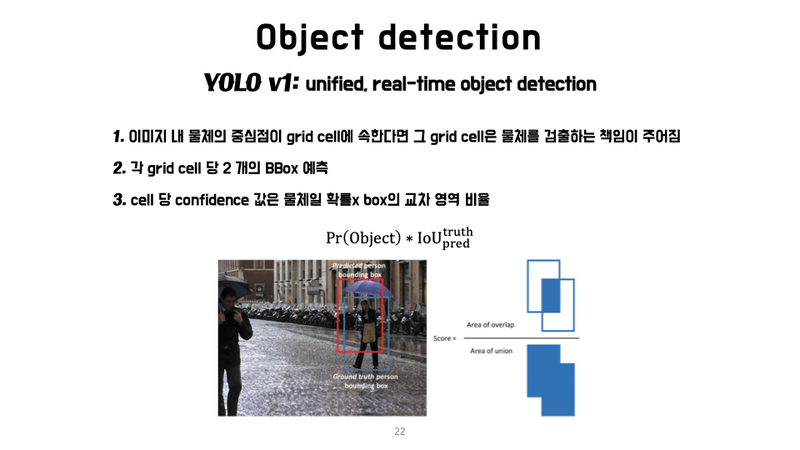

- YOLO의 목표는 grid에 포함되는 물체를 잘 잡아내는 것이다. 이를 위해 IoU를 사용한다고 한다.

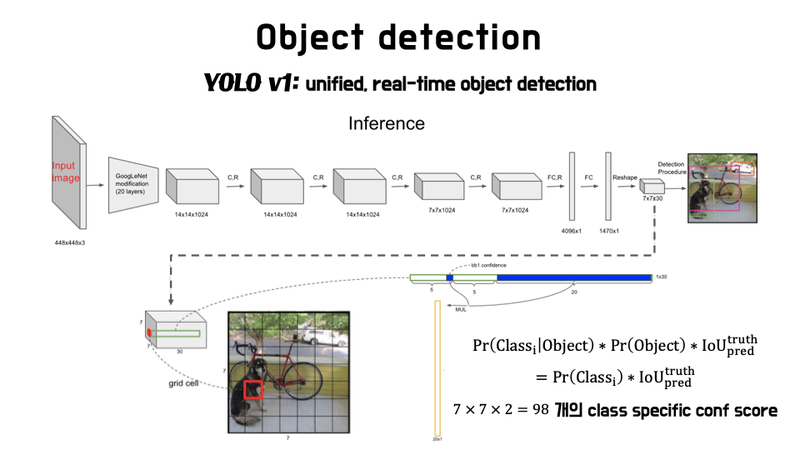

- 위 그림에서 7x7x30을 보면, 7x7은 49개의 grid cell이고, 30은 5xB+C, 즉 5x2+20이다. (5는 x,y,w,h,confidence score)
- 테스트할 때 각각의 bounding box의 confidence score와 각각의 조건부 class (2개) 확률을 곱하면 갯수는 7x7x2=98개이다.

YOLO v1은 Faster R-CNN과 성능은 큰 차이가 나지 않으면서 속도는 6배 이상인 혁신적인 연구였다. 하지만 단점은 있었다.   
- grid cell이 하나의 클래스만 예측 가능하므로 작은 object에 대해 예측이 어려웠다.
- 모델 구조상 backbone만 거친 feature map을 대상으로 bbox 정보를 예측하기 때문에 localization이 다소 부저오학했다.

#### (2) YOLO v2

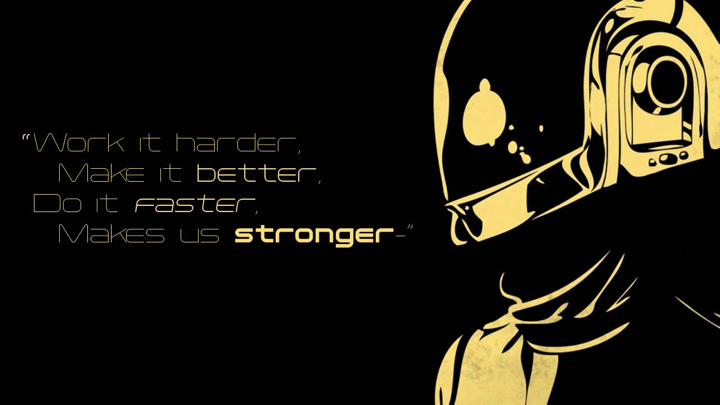

- Make it better : 정확도를 올리기 위한 방법

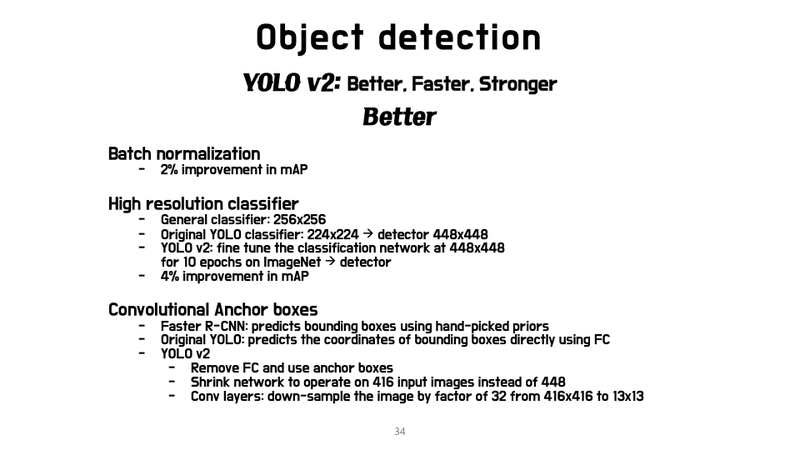

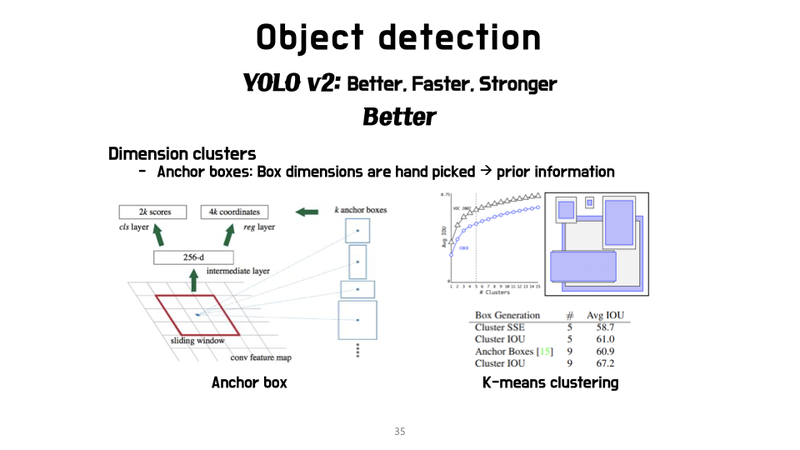

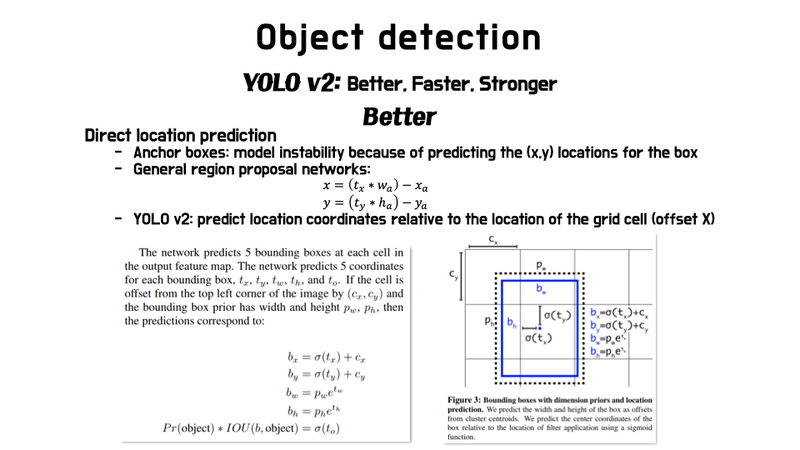

- Do it faster : detection 속도 향상

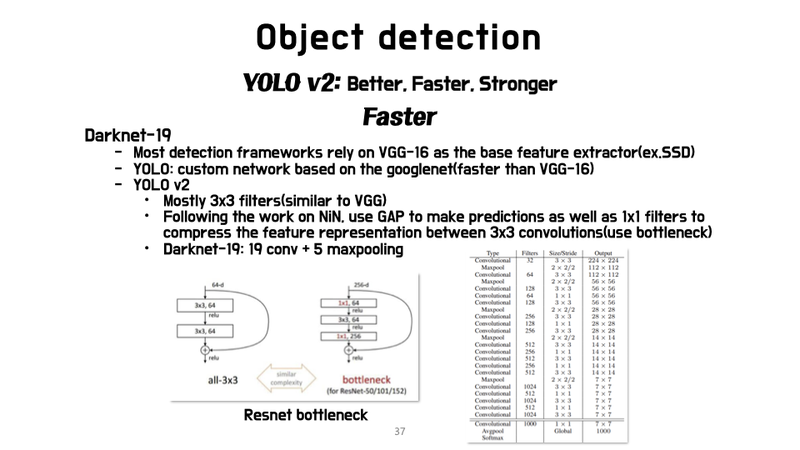

- Makes us stronger : 더 많은 class를 예측하기 위한 방법.

이를 위해 Hierarchical classification를 사용했다. YOLO v2는 9000개의 class를 classification하면서 detection까지 해냈다고 한다.   

## 2.SSD

SSD는 YOLO v1에서 grid를 사용해서 생기는 단점을 해결할 수 있는 테크닉을 제안했다.

- Image Pyramid
- Pre-defined Anchor Box

- Image Pyramid

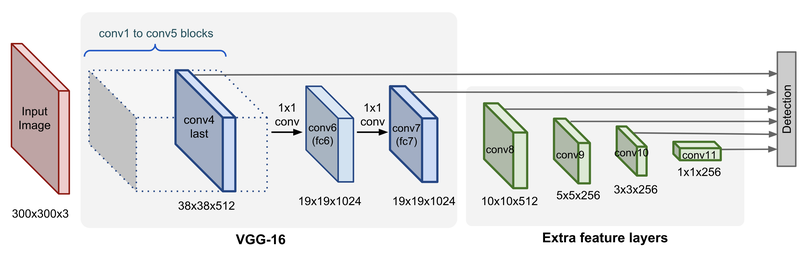

Image Pyramid는 ImageNet으로 사전학습된 VGG16을 사용한다. VGG에서 pooling layer를 거친 block은 하나의 image feature로 사용 가능하다.   
YOLO에서 7x7 크기의 feature map을 사용한다. 하지만 SSD는 38x38, 19x19, 10x10, 5x5, 3x3 등의 다양한 크기를 사용하였다.   
하지만 이렇게 하면서 계산량이 많아졌다는 단점이 존재했다.

YOLO v1의 또 다른 단점은 box 정보 (x,y,w,h)를 예측하기 위한 seed 정보가 없기 때문에 넓은 bbox 분포를 모두 학습할 수 없었다는 점이다. 이로 인한 성능 손실이 존재할 수 있었다. 따라서 Faster R-CNN 등에서 사용하는 anchor를 적용할 필요가 있었다.